# Registro de población por alcaldia en la Ciudad de México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('poblacion.csv')

In [2]:
poblacion_coyoacan = df[df['Alcaldía'] == 'Coyoacán']
poblacion_coyoacan

,Año,Alcaldía,Grupo de edad,Población
66,2020,Coyoacán,0 a 4 años,26627
67,2020,Coyoacán,5 a 9 años,30448
68,2020,Coyoacán,10 a 14 años,34252
69,2020,Coyoacán,15 a 19 años,39399
70,2020,Coyoacán,20 a 24 años,47036
...,...,...,...,...
787,2000,Coyoacán,85 a 89 años,2512
788,2000,Coyoacán,90 a 94 años,1013
789,2000,Coyoacán,95 a 99 años,395
790,2000,Coyoacán,100 años y más,89


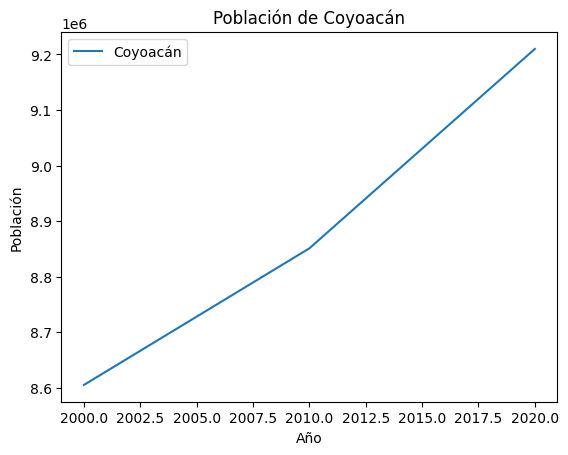

In [3]:
# Agrupar por año y sumar la columna "Población"
df_suma_poblacion = df.groupby('Año')['Población'].sum().reset_index()

plt.plot(df_suma_poblacion['Año'],
         df_suma_poblacion['Población'], label='Coyoacán')
plt.xlabel('Año')
plt.ylabel('Población')
plt.title('Población de Coyoacán')
plt.legend()
plt.show()

In [4]:
df_suma_poblacion['Población'] = df_suma_poblacion['Población'].apply(lambda x: x / 1000)
print(df_suma_poblacion)

    Año  Población
0  2000   8605.239
1  2010   8851.080
2  2020   9209.944


In [5]:
import json

# Leer el archivo JSON
with open('viviendas.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Asegurarse de que data es una lista de objetos
if isinstance(data, dict) and "features" in data:
    features = data["features"]
elif isinstance(data, list):
    features = data
else:
    raise ValueError("La estructura del JSON no es la esperada.")

# Filtrar las entradas que tienen "alcaldia" igual a "COYOACAN"
filtered_data = [
    feature for feature in features if feature["properties"]["alcaldia"] == "COYOACAN"]

# Crear un nuevo diccionario con el tipo de estructura inicial
filtered_data_dict = {"type": "FeatureCollection", "features": filtered_data}

# Guardar los datos filtrados en un nuevo archivo JSON
with open('filtered_dat.json', 'w', encoding='utf-8') as file:
    json.dump(filtered_data_dict, file, ensure_ascii=False, indent=4)

In [6]:
import json
import pandas as pd

# Leer el archivo JSON
with open('viviendas.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Asegurarse de que data contiene una lista de características bajo la clave "features"
if "features" in data:
    features = data["features"]
else:
    raise ValueError("La estructura del JSON no es la esperada.")

# Filtrar las entradas que tienen "alcaldia" igual a "COYOACAN"
filtered_data = [
    feature for feature in features if feature["properties"]["alcaldia"] == "COYOACAN"]

# Contar el número de elementos filtrados
count = len(filtered_data)

# Inicializar las sumas
sums = {
    "VPH_AEASP": 0,
    "VPH_AGUAFV": 0,
    "VPH_TINACO": 0,
    "VPH_CISTER": 0,
    "VPH_EXCSA": 0,
    "VPH_LETR": 0,
    "VPH_DRENAJ": 0,
    "VPH_NODREN": 0,
    "VPH_CEL": 0,
    "VPH_TV": 0
}

# Sumar las propiedades especificadas
for feature in filtered_data:
    properties = feature["properties"]
    for key in sums:
        sums[key] += properties.get(key, 0)

# Crear un DataFrame con los resultados
df = pd.DataFrame([{
    "count": count,
    **sums
}])

# Guardar el DataFrame en un archivo CSV
df.to_csv('filtered_data_summary.csv', index=False)

print("Número de elementos filtrados:", count)
print("Suma de las propiedades especificadas:")
print(df)

Número de elementos filtrados: 153
Suma de las propiedades especificadas:
   count  VPH_AEASP  VPH_AGUAFV  VPH_TINACO  VPH_CISTER  VPH_EXCSA  VPH_LETR  \
0    153     190385          43      154376      113955     190745        11   

   VPH_DRENAJ  VPH_NODREN  VPH_CEL  VPH_TV  
0      190898          76   179185  184365  


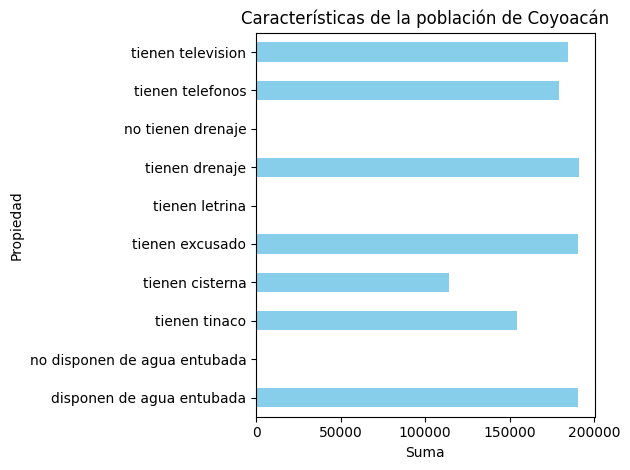

In [16]:
# Renombrar las columnas del DataFrame
df.rename(columns={
    "VPH_AEASP": "disponen de agua entubada",
    "VPH_AGUAFV": "no disponen de agua entubada",
    "VPH_TINACO": "tienen tinaco",
    "VPH_CISTER": "tienen cisterna",
    "VPH_EXCSA": "tienen excusado",
    "VPH_LETR": "tienen letrina",
    "VPH_DRENAJ": "tienen drenaje",
    "VPH_NODREN": "no tienen drenaje",
    "VPH_CEL": "tienen telefonos",
    "VPH_TV": "tienen television"
}, inplace=True)

# Crear una gráfica de barras con los datos del DataFrame
df_sums = df.drop(columns=['count'])
df_sums.T.plot(kind='barh', legend=False, color='skyblue')

# Añadir etiquetas de cantidad sobre cada barra
#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x()
#                * 1.005, p.get_height() * 1.005))

# Personalizar la gráfica
plt.title('Características de la población de Coyoacán')
plt.xlabel('Suma')
plt.ylabel('Propiedad')
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Mostrar la gráfica
plt.show()